## Explore CMIP6 data on Casper

In [1]:
#### Ensure you have the required libraries installed, these will make it much easier to work with the data

# ! pip install netcdf4 xarray[io] cartopy nc-time-axis

In [2]:
import pandas as pd
import xarray as xr
import numpy as np
import os.path

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# This can be useful for working with multiple processors - to be explored later on
# from dask.distributed import Client, LocalCluster

Output data is in `/glade/collections/cmip/CMIP6/{activity}/NCC/NorESM2-LM/{experiment}`

Other model data can be found similar to example path:
- `/glade/collections/cmip/CMIP6/DAMIP/NCAR/CESM2/hist-aer/r1i1p1f1/Amon/tas/gn/latest/*.nc`

Input data (the emissions data used to drive the experiments): `/glade/p/cesmdata/cseg/inputdata/atm/cam/chem/emis/`

In [3]:
# You can explore these directly using the command line
!ls /glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/

1pctCO2  abrupt-4xCO2  amip  esm-hist  esm-piControl  historical  piControl


In [4]:
# Or open them directly with xarray. E.g. to open the ssp245 scenario monthly data for precipitation from the 11th realization of the CESM2 model:
xr.open_mfdataset("/glade/collections/cmip/CMIP6/ScenarioMIP/NCAR/CESM2/ssp245/r11i1p1f1/Amon/pr/gn/files/d20200528/*.nc")

/glade/u/home/ady/.local/lib/python3.10/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/glade/u/home/ady/.local/lib/python3.10/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


<xarray.Dataset> Size: 236MB
Dimensions:    (time: 1032, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time       (time) object 8kB 2015-01-15 12:00:00 ... 2100-12-15 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    pr         (time, lat, lon) float32 228MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    time_bnds  (time, nbnd) object 17kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bnds   (time, lat, nbnd) float64 3MB dask.array<chunksize=(600, 192, 2), meta=np.ndarray>
    lon_bnds   (time, lon, nbnd) float64 5MB dask.array<chunksize=(600, 288, 2), meta=np.ndarray>
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   735110.0
    branch_time_in_parent:  735110.0
    case_id:                1731
    ...                     ...
    sub_experiment_id:      none
    table_id:               Amon
    tracking_id:            hdl:21.14100/077f7679-2555-431e-a864-29011759e8e7
    variable_id:            pr
    variant_info:           CMIP6 SSP2-4.5 experiments (2015-2100) with CAM6,...
    variant_label:          r11i1p1f1

The model names are not very obvious but you can either google them, ask ChatGPT, or look them up in these structured dictionaries: https://github.com/PCMDI/cmip6-cmor-tables/tree/main/Tables 
- Amon: https://github.com/PCMDI/cmip6-cmor-tables/blob/main/Tables/CMIP6_Amon.json 
- day: https://github.com/PCMDI/cmip6-cmor-tables/blob/main/Tables/CMIP6_day.json

### Notes
- /glade/collections/cmip/CMIp6/
    - Is the base directory for all CMIP6 data on NCAR
- {acitivity} defines a CMIP6 acitivty (like DAMIP, scenarioMIP, CMIP)
- NCC is the institution 
    - which is Norweigian Climate Centre
- NorESM2-LM is the climate model name which we will be using (for replication)
- {experiment} is the experiment name (like historical, ssp245, piControl)

In [5]:
def get_MIP(experiment):
    """
    Utility function to get the activity associated with a particular experiment
    """
    if experiment == 'ssp245-covid':
        return 'DAMIP'
    elif experiment == 'ssp370-lowNTCF':
        return 'AerChemMIP'
    elif experiment.startswith('ssp'):
        return 'ScenarioMIP'
    elif experiment.startswith('hist-'):
        return 'DAMIP'
    else:
        return 'CMIP'

In [6]:
def get_data(variable, experiment, member):
    """
    Read a particular CMIP6 (Amon) variable from NorESM2
    """
    import glob
    files = glob.glob(f"/glade/collections/cmip/CMIP6/{get_MIP(experiment)}/NCC/NorESM2-LM/{experiment}/{member}/Amon/{variable}/gn/v20190815/{variable}/*.nc")
    return xr.open_mfdataset(files)[variable]

In [7]:
# Now simply call this function to get data a particular variable, experiment and ensemble member
tas = get_data('tas', 'historical', 'r1i1p1f1')
tas

<xarray.DataArray 'tas' (time: 1980, lat: 96, lon: 144)> Size: 109MB
dask.array<concatenate, shape=(1980, 96, 144), dtype=float32, chunksize=(1, 96, 144), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    height   float64 8B 2.0
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    original_name:  TREFHT
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-15T12:42:20Z altered by CMOR: Treated scalar dime...

*Note*, the ensemble member format: 
`r` for realization, `i` for initialization, `p` for physics, and `f` for forcing

We're only interested in different realizations in this project, so try different r numbers but keep the rest the same: E.g.: `r1i1p1f1`, `r2i1p1f1`, `r3i1p1f1`
- Note** Experiments may not have different realizations

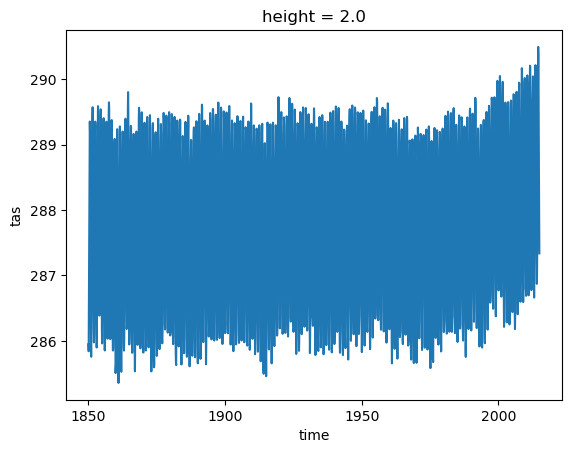

In [8]:
# When averaging gridded data on a sphere, we need to account for the fact that the values near the poles have less area
weights = np.cos(np.deg2rad(tas.lat))
weights.name = "weights"

tas_timeseries = tas.weighted(weights).mean(['lat', 'lon'])
tas_timeseries.plot()
plt.show()

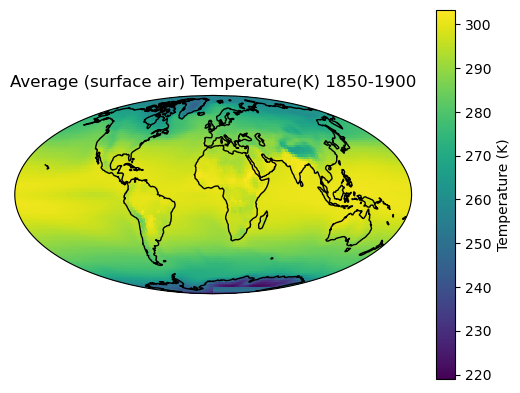

In [9]:
# Plot a map of the average temperature between 1850-1900

tas.sel(time=slice('1850','1900')).mean('time').plot(
    transform=ccrs.PlateCarree(), # This is the projection the data is stored as
    subplot_kws={"projection": ccrs.Mollweide()}, # This describes the projection to plot onto (which happens to be the projection the data is already in so no transformation is needed in this case)
    cbar_kwargs={'label': 'Temperature (K)'}
) # explore other projections here: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

plt.title('Average (surface air) Temperature(K) 1850-1900')
plt.gca().coastlines()
plt.show()

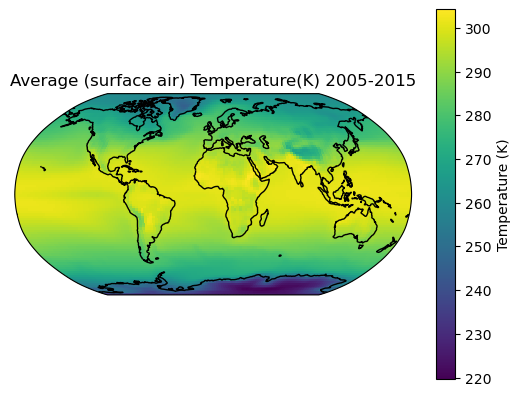

In [10]:
tas.sel(time=slice('2005','2015')).mean('time').plot(
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": ccrs.Robinson()},
    cbar_kwargs={'label': 'Temperature (K)'}
)

plt.title('Average (surface air) Temperature(K) 2005-2015')
plt.gca().coastlines()
plt.show()

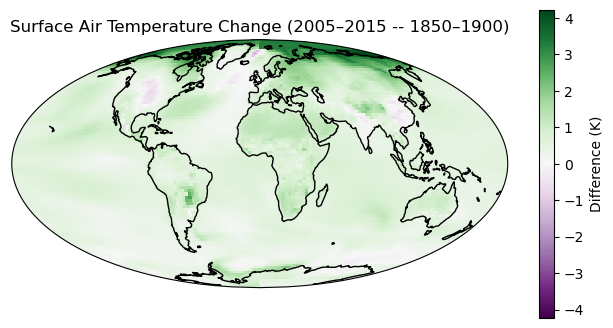

In [11]:
tas1 = tas.sel(time=slice('1850', '1900')).mean('time')
tas2 = tas.sel(time=slice('2005', '2015')).mean('time')
diff = tas2-tas1

plt.figure(figsize=(8, 4))
diff.plot(
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": ccrs.Mollweide()},
    cmap='PRGn',
    cbar_kwargs={'label': 'Difference (K)'})

plt.title('Surface Air Temperature Change (2005–2015 -- 1850–1900)')
plt.gca().coastlines()
plt.show()

In [12]:
pr = get_data('pr', 'historical', 'r1i1p1f1')
pr

<xarray.DataArray 'pr' (time: 1980, lat: 96, lon: 144)> Size: 109MB
dask.array<concatenate, shape=(1980, 96, 144), dtype=float32, chunksize=(1, 96, 144), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          kg m-2 s-1
    original_name:  PRECC+PRECL
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2020-06-04T20:38:11Z altered by CMOR: Converted type from...

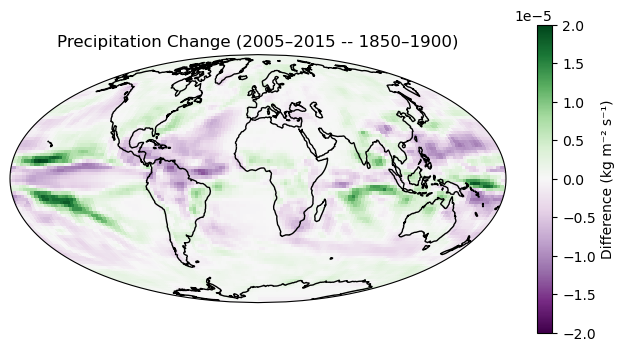

In [13]:
pr1 = pr.sel(time=slice('1850', '1900')).mean('time')
pr2 = pr.sel(time=slice('2005', '2015')).mean('time')
diff = pr2-pr1

plt.figure(figsize=(8, 4))
diff.plot(
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": ccrs.Mollweide()},
    cmap='PRGn',
    cbar_kwargs={'label': 'Difference (kg m⁻² s⁻¹)'})

plt.title('Precipitation Change (2005–2015 -- 1850–1900)')
plt.gca().coastlines()
plt.show()

In [14]:
def get_data1(variable, experiment, member):
    """
    Read a particular CMIP6 (Amon) variable from NorESM2
    """
    import glob
    files = glob.glob(f"/glade/collections/cmip/CMIP6/ScenarioMIP/NCC/NorESM2-LM/ssp126/r1i1p1f1/day/tasmax/gn/v20191108/tasmax/*.nc")
    return xr.open_mfdataset(files)[variable]

# xr.open_mfdataset("/glade/collections/cmip/CMIP6/ScenarioMIP/NCC/NorESM2-LM/ssp126/r1i1p1f1/day/tasmax/gn/v20191108/tasmax/*.nc")

In [15]:
tasmax = get_data1('tasmax', 'ssp126', 'r1i1p1f1')
tasmax

<xarray.DataArray 'tasmax' (time: 31388, lat: 96, lon: 144)> Size: 2GB
dask.array<concatenate, shape=(31388, 96, 144), dtype=float32, chunksize=(1, 96, 144), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 251kB 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
  * lat      (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    height   float64 8B 2.0
Attributes:
    standard_name:  air_temperature
    long_name:      Daily Maximum Near-Surface Air Temperature
    comment:        maximum near-surface (usually, 2 meter) air temperature (...
    units:          K
    original_name:  TREFHTMX
    cell_methods:   area: mean time: maximum
    cell_measures:  area: areacella
    history:        2019-12-06T14:54:44Z altered by CMOR: Treated scalar dime...

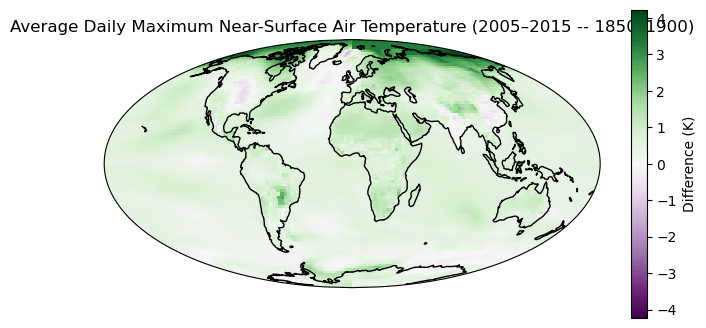

In [16]:
tasmax1 = tas.sel(time=slice('1850', '1900')).mean('time')
tasmax2 = tas.sel(time=slice('2005', '2015')).mean('time')
diff = tasmax2-tasmax1

plt.figure(figsize=(8, 4))
diff.plot(
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": ccrs.Mollweide()},
    cmap='PRGn',
    cbar_kwargs={'label': 'Difference (K)'})

plt.title('Average Daily Maximum Near-Surface Air Temperature (2005–2015 -- 1850–1900)')
plt.gca().coastlines()
plt.show()

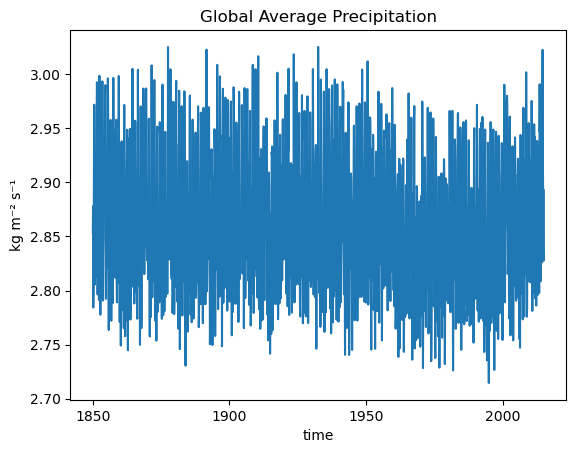

In [17]:
pr_timeseries = (pr * 86400).weighted(weights).mean(['lat', 'lon'])  # convert to mm/day

pr_timeseries.plot()
plt.title("Global Average Precipitation")
plt.ylabel("kg m⁻² s⁻¹")
plt.show()

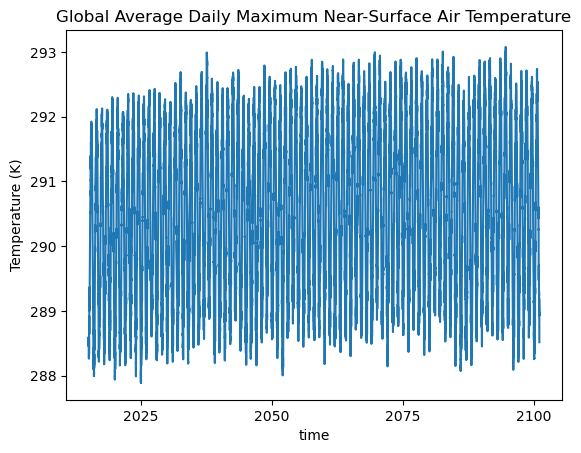

In [18]:
tasmax_timeseries = tasmax.weighted(weights).mean(['lat', 'lon'])

tasmax_timeseries.plot()
plt.title("Global Average Daily Maximum Near-Surface Air Temperature")
plt.ylabel("Temperature (K)")
plt.show()